# 数据可视化作业题目

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [3]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
year = data.groupby('year')['passengers'].sum().reset_index()

month = data.groupby('month')['passengers'].sum().reset_index()

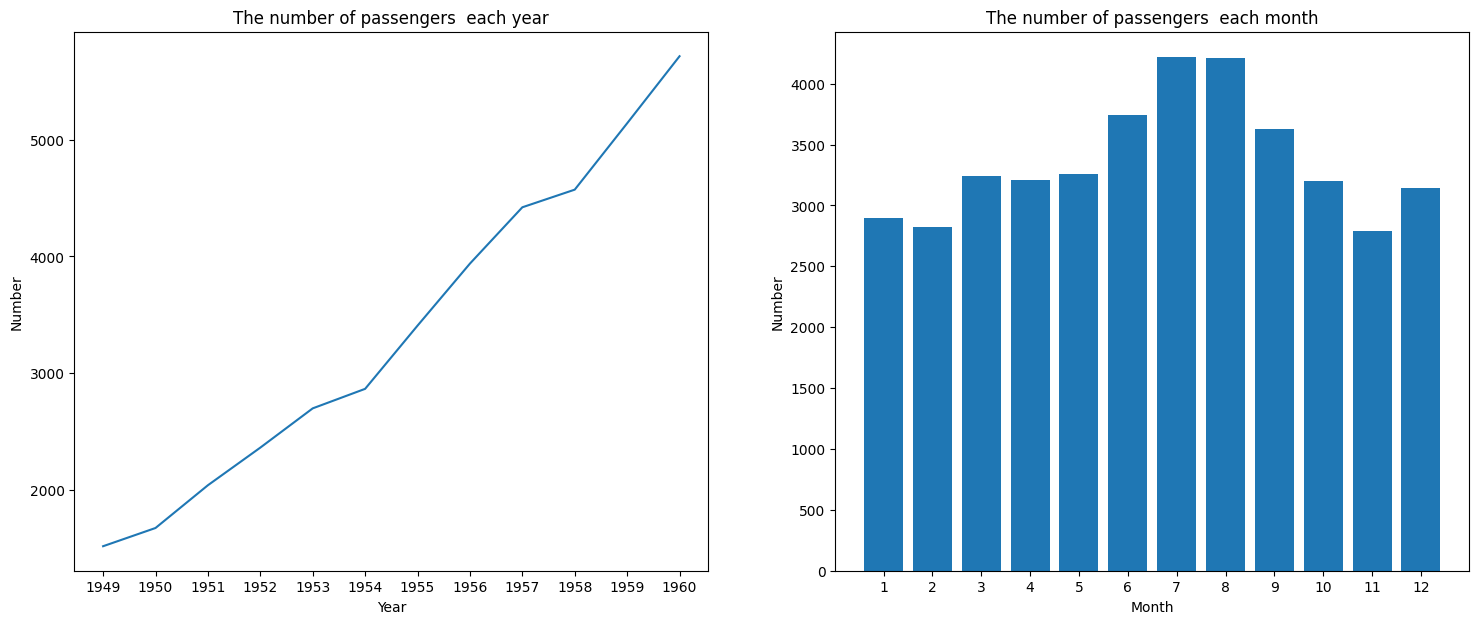

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

#year
axes[0].plot(year['year'], year['passengers'])

axes[0].set_xticks(year['year'])

axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number')
axes[0].set_title('The number of passengers  each year')

# month
axes[1].bar(np.array(month.index.tolist())+1, month['passengers'])
axes[1].set_xticks(np.array(month.index.tolist())+1)

axes[1].set_title('The number of passengers  each month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number')
plt.show()

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [26]:
data = sns.load_dataset("iris",data_home='seaborn-data',cache=True)
data.head()
data.iloc[90]
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

sepal_length           5.5
sepal_width            2.6
petal_length           4.4
petal_width            1.2
species         versicolor
Name: 90, dtype: object

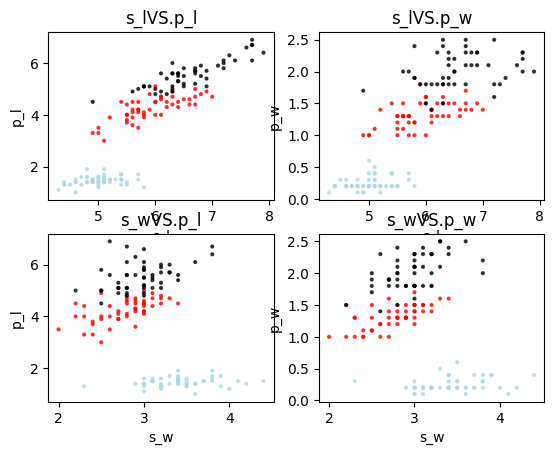

In [36]:
color = {'setosa':'lightblue','virginica':'black','versicolor':'red'}
data['colors'] = data['species'].map(color)
fig, axes = plt.subplots(nrows=2, ncols=2)

def subgraph(x,y,xname,yname,axes,data):
    axes[x][y].scatter(data[xname],data[yname],c=data['colors'],s=4,alpha=0.7)
    axes[x][y].set_xlabel(xname[0]+xname[5]+xname[6])
    axes[x][y].set_ylabel(yname[0]+yname[5]+yname[6])
    axes[x][y].set_title(xname[0]+xname[5]+xname[6]+'VS.'+yname[0]+yname[5]+yname[6])

subgraph(0,0,'sepal_length','petal_length',axes,data)
subgraph(0,1,'sepal_length','petal_width',axes,data)
subgraph(1,0,'sepal_width','petal_length',axes,data)
subgraph(1,1,'sepal_width','petal_width',axes,data)


plt.show()



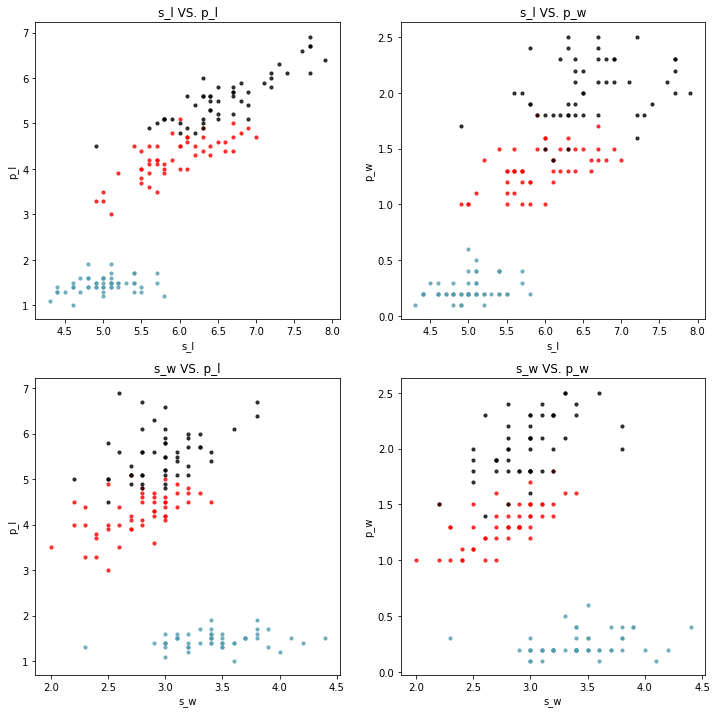

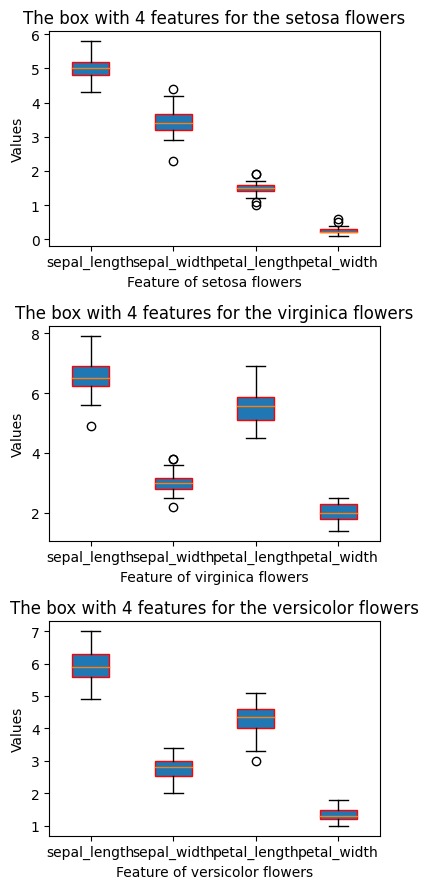

In [63]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(4, 9))
def subgraph(x,specie,axes,data):
    axes[x].boxplot([data[data['species'] == specie][data.columns[i]] for i in range(4)],
                    labels=data.columns[0:4],
                    patch_artist=True,
                    boxprops=dict(color='red')
                   )
    axes[x].set_xlabel("Feature of "+specie+" flowers")
    axes[x].set_ylabel("Values")
    axes[x].set_title("The box with 4 features for the "+specie + " flowers")
for idx,i in enumerate(list(set(data['species']))):
    subgraph(idx,i,axes,data)  
plt.tight_layout() 
plt.show()

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [64]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


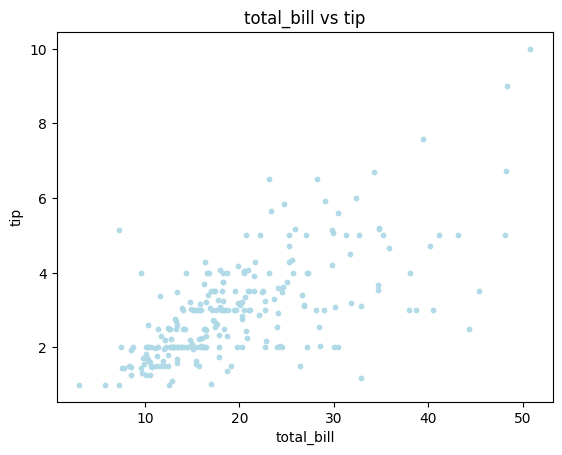

In [77]:
def scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots() #创建窗口和坐标
    ax.scatter(x_data, y_data, s = 10, color = 'lightblue', alpha = 0.9) #画散点图设置字体大小，颜色，和透明度
    ax.set_title(title)#设置标题
    ax.set_xlabel(x_label)#设置x轴
    ax.set_ylabel(y_label)#设置y轴

scatterplot(x_data = data['total_bill'], y_data = data['tip'], x_label = 'total_bill', y_label = 'tip', title = 'total_bill vs tip')

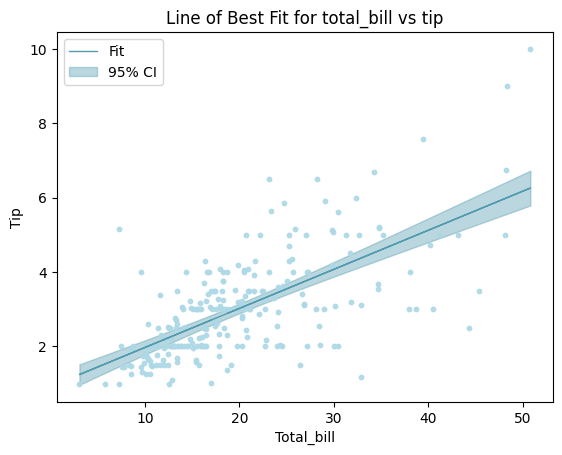

In [91]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
import pandas as pd
x = sm.add_constant(data['total_bill']) # 添加常数项，进行线性回归
y = data['tip']
regr = sm.OLS(y, x) #使用最小二乘法进行线性回归
res = regr.fit()
st, result_data, ss2 = summary_table(res, alpha=0.05) #生成回归结果的汇总表
fitted_values = result_data[:,2]

mean_ci_low, mean_ci_upp = result_data[:,4:6].T  #获取预测均值的置信区间下界和上界

CI_df = pd.DataFrame(columns = ['x_data', 'low_CI', 'upper_CI']) # 创建包含置信区间数据的 DataFrame
CI_df['x_data'] = data['total_bill']
CI_df['low_CI'] = mean_ci_low
CI_df['upper_CI'] = mean_ci_upp
CI_df.sort_values('x_data', inplace = True) 

fig, ax = plt.subplots()#创建窗口和坐标

def scatter1(x_data, y_data): #定义散点图
    ax.scatter(x_data, y_data, s = 10, color = 'lightblue', alpha = 0.9) #画散点图设置字体大小，颜色，和透明度
   

def line(x_data, y_data, sorted_x, low_CI, upper_CI, x_label, y_label, title):
    # 创建绘图对象
    

    # 绘制预测曲线
    ax.plot(x_data, y_data, lw = 1, color = '#539caf', alpha = 1, label = 'Fit')
    # 绘制置信区间，顺序填充
    ax.fill_between(sorted_x, low_CI, upper_CI, color = '#539caf', alpha = 0.4, label = '95% CI')
    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
line(x_data = data['total_bill'], y_data = fitted_values, sorted_x = CI_df['x_data'], low_CI = CI_df['low_CI'], upper_CI = CI_df['upper_CI']
    ,x_label = 'Total_bill', y_label = 'Tip', title = 'Line of Best Fit for total_bill vs tip')

scatter1(x_data = data['total_bill'], y_data = data['tip'])

In [94]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


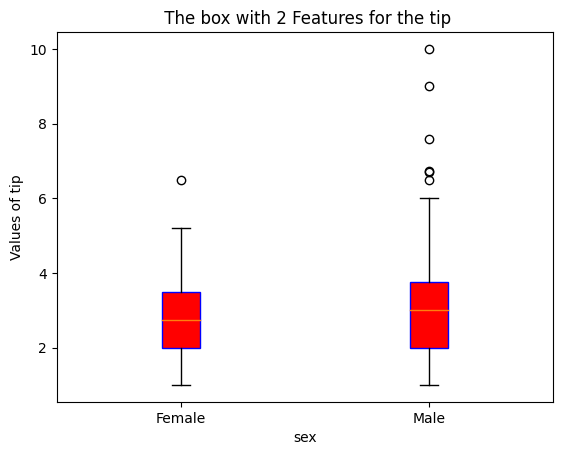

In [102]:
#定义画Feature vs tip的函数
def tip(feature): 
    plt.boxplot([data.loc[data[feature] == i,'tip'] for i in set(data[feature])],
                    labels=[i for i in set(data[feature])],
                    patch_artist=True,
                    boxprops=dict(color='b',facecolor='red')
                    
                   )
    plt.xlabel(feature)
    plt.ylabel("Values of tip")
    plt.title(" The box with 2 Features for the tip")
tip('sex')

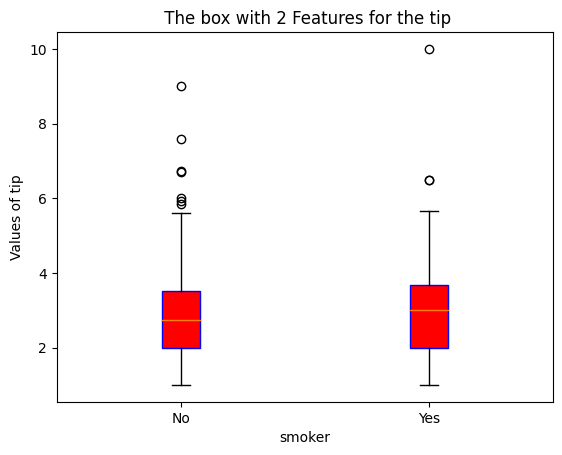

In [103]:
tip("smoker")

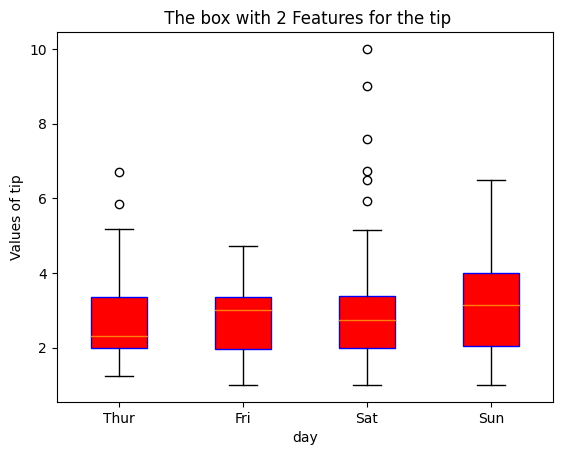

In [104]:
tip("day")

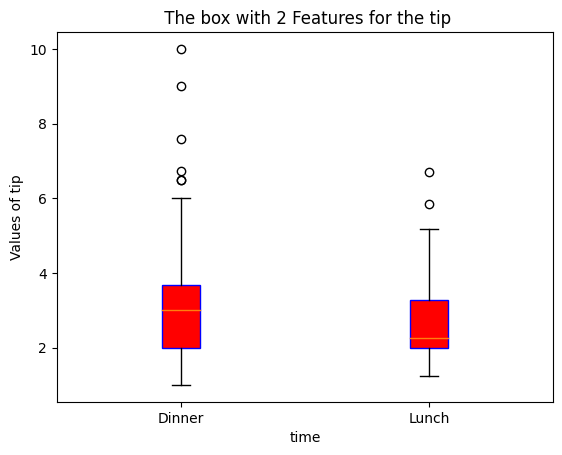

In [105]:
tip("time")

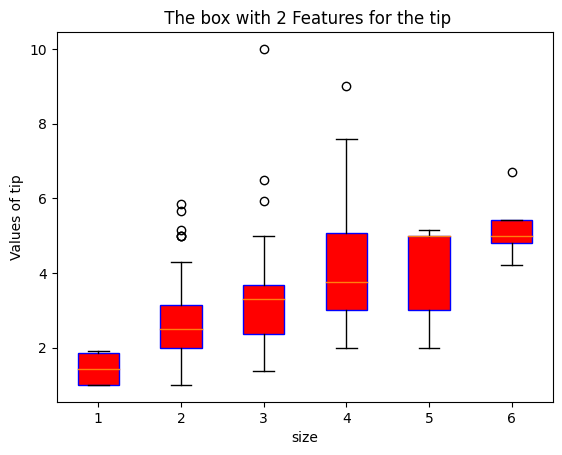

In [106]:
tip("size")

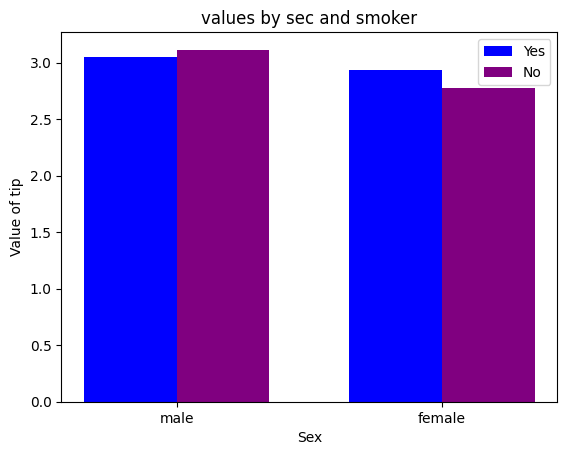

In [108]:
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    fig, ax = plt.subplots()
    
    x_data_len = np.arange(len(x_data)) # 设置每一组柱状图的宽度
    total_width = 0.8   # 设置每一个柱状图的宽度
  
    ind_width = total_width / len(y_data_list) # 计算中心偏移量
    
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data, y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_xticks(x_data_len + alteration / 2, x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')
mean_data = data[['tip', 'smoker', 'sex']].groupby(['smoker','sex']).mean()

categories = ["male","female"]
values1 = [mean_data['tip'][0],mean_data['tip'][1]]
values2 = [mean_data['tip'][2],mean_data['tip'][3]]


bar_width = 0.35#设置宽度


x_data1 = np.arange(len(categories))# 计算x
x_data2 = x_data1 + bar_width



plt.bar(x_data1, values1, width=bar_width, color='blue', label='Yes')
plt.bar(x_data2, values2, width=bar_width, color='purple', label='No')
plt.xlabel('Sex')
plt.ylabel('Value of tip')
plt.title('values by sec and smoker')
plt.xticks(x_data1 + bar_width / 2, categories)  # 设置横坐标刻度位置
plt.legend()
plt.show()


In [109]:
data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [110]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


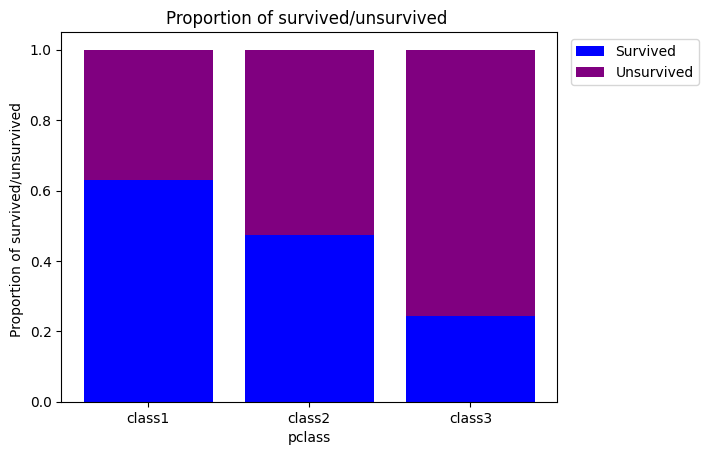

In [116]:
data1 = data.groupby("pclass")["survived"].sum()# 计算每个舱位等级的幸存人数

data2= data.groupby("pclass")["pclass"].count() # 计算每个舱位等级的总人数

data_df = pd.concat([data1, data2], axis=1, keys=["survived","total"])# 合并两个数据集，创建一个包含幸存人数、总人数和未幸存人数的数据框

data_df["unsurvived"] = data_df["total"] - data_df["survived"] # 计算未幸存人数

data_df["survived_prop"] = data_df["survived"]/data_df["total"] # 计算幸存和未幸存的比例

data_df["unsurvived_prop"] = data_df["unsurvived"]/data_df["total"]

def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title): # 定义绘制堆叠条形图的函数
    _, ax = plt.subplots()
   
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
stackedbarplot(x_data = ["class1","class2","class3"] # 调用函数绘制堆叠条形图

               , y_data_list = [data_df["survived_prop"], data_df["unsurvived_prop"]]
               , y_data_names = ['Survived', 'Unsurvived']
               , colors = ['blue', 'purple']
               , x_label = "pclass"
               , y_label = 'Proportion of survived/unsurvived '
               , title = 'Proportion of survived/unsurvived ')

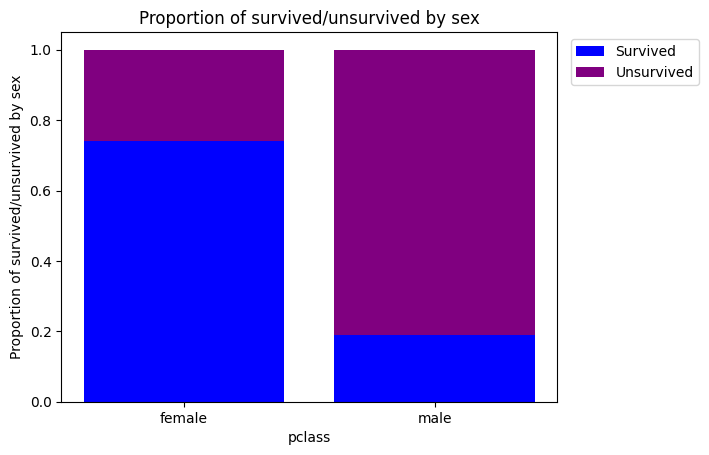

In [117]:
data1 = data.groupby("sex")["survived"].sum()

data2= data.groupby("sex")["pclass"].count()

data_df = pd.concat([data1, data2], axis=1, keys=["survived","total"])

data_df["unsurvived"] = data_df["total"] - data_df["survived"]

data_df["survived_prop"] = data_df["survived"]/data_df["total"]

data_df["unsurvived_prop"] = data_df["unsurvived"]/data_df["total"]

stackedbarplot(x_data = ["female","male"]
               , y_data_list = [data_df["survived_prop"], data_df["unsurvived_prop"]]
               , y_data_names = ['Survived', 'Unsurvived']
               , colors = ['blue', 'purple']
               , x_label = "pclass"
               , y_label = 'Proportion of survived/unsurvived by sex'
               , title = 'Proportion of survived/unsurvived by sex')

In [121]:
def feature(feature): 
    plt.boxplot([data.loc[data["survived"] == i,feature] for i in set(data["survived"])],
                    labels=[i for i in set(data["survived"])],
                    patch_artist=True,
                    boxprops=dict(color='blue')
                   )
    plt.xlabel("survived")
    plt.ylabel(feature)
    plt.title("The box with 2 teatures "+" for "+ feature)
    plt.show()
    feature("fare")

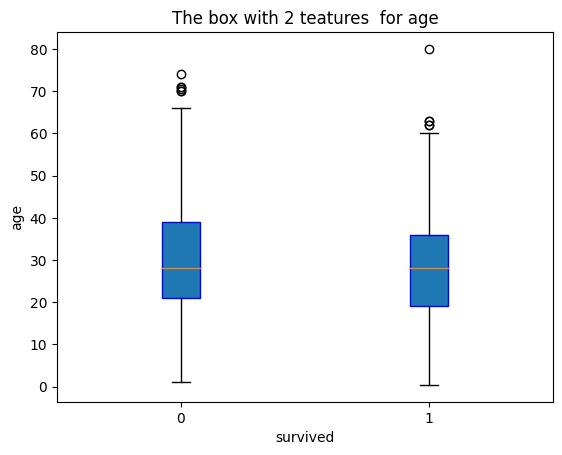

TypeError: 'str' object is not callable

In [126]:
data = data.dropna(subset=['age'])
feature("age")


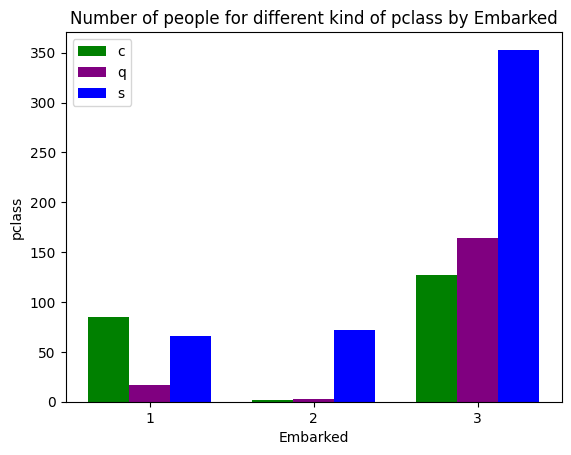

In [131]:
data = sns.load_dataset("titanic")
data.head()
df1 = data[data["pclass"] == 1]
df2 = data[data["pclass"] == 2]
df3 = data[data["pclass"] == 3]
df1 = df1.groupby("embarked").count()["pclass"]
df2 = df2.groupby("embarked").count()["pclass"]
df3 = df3.groupby("embarked").count()["pclass"]
categories = [1,2,3]
values1 = df1
values2 = df2
values3 = df3
# 设置条形图的宽度
bar_width = 0.25

# 计算并列的条形图的横坐标位置
x_data1 = np.arange(len(categories))
x_data2 = x_data1 + bar_width
x_data3 = x_data2 + bar_width
# 创建并列的条形图

plt.bar(x_data1, values1, width=bar_width, color='green', label='c')
plt.bar(x_data2, values2, width=bar_width, color='purple', label='q')
plt.bar(x_data3, values3, width=bar_width, color='blue', label='s')


plt.xlabel('Embarked')
plt.ylabel('pclass')
plt.title('Number of people for different kind of pclass by Embarked')
plt.xticks(x_data1 + bar_width, categories)  # 设置横坐标刻度位置
plt.legend()
plt.show()

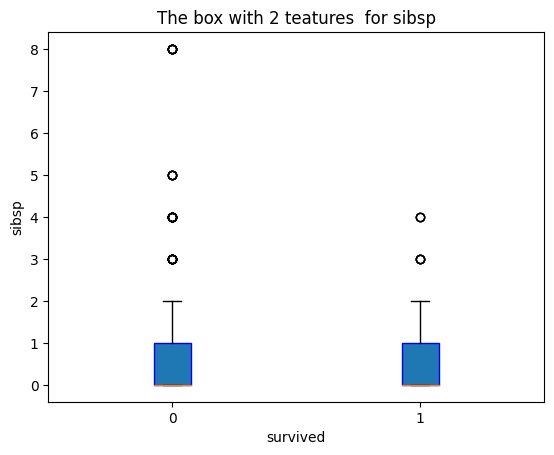

TypeError: 'str' object is not callable

In [132]:
feature("sibsp")

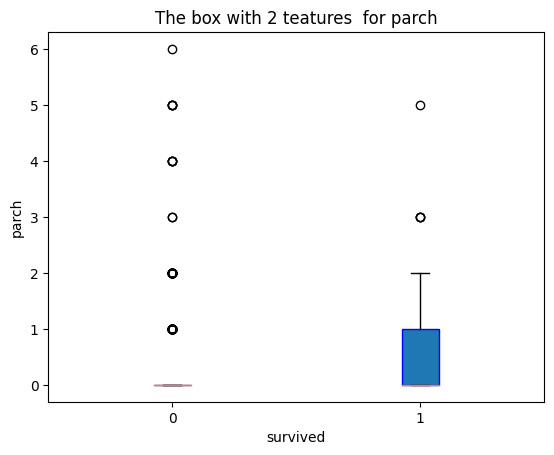

TypeError: 'str' object is not callable

In [133]:
feature("parch")

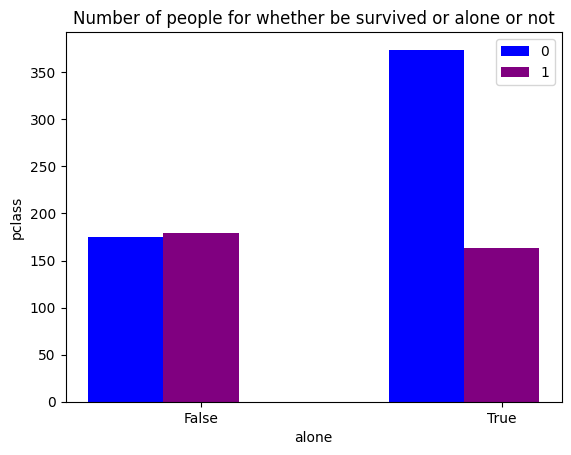

In [135]:
df1 = data[data["survived"] == 0].groupby("alone")["alone"].count()
df2 = data[data["survived"] == 1].groupby("alone")["alone"].count()
categories = ["False","True"]
values1 = df1
values2 = df2

# 设置条形图的宽度
bar_width = 0.25

# 计算并列的条形图的横坐标位置
x_data1 = np.arange(len(categories))
x_data2 = x_data1 + bar_width

# 创建并列的条形图

plt.bar(x_data1, values1, width=bar_width, color='blue', label='0')
plt.bar(x_data2, values2, width=bar_width, color='purple', label='1')


plt.xlabel('alone')
plt.ylabel('pclass')
plt.title('Number of people for whether be survived or alone or not')
plt.xticks(x_data1 + bar_width, categories)  # 设置横坐标刻度位置
plt.legend()
plt.show()